In [159]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import sklearn as sk
from sklearn import ensemble
from datetime import datetime
import scipy.stats as stats

In [160]:
# Mission 1 -
# faire du nettoyage
# voir pour faire des choix sur le traitement 
# des valeurs manquantes ou aberrantes

In [161]:
clients = pd.read_csv("clients.csv")
clients

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [162]:
clients.info()
# this df seems clear with no null values (8623/8623)
# like the others df, by the way

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [163]:
# check duplicates (here, nothing ...)
clients = clients.drop_duplicates()
len(clients)

8623

In [164]:
clients.isnull().sum().sort_values(ascending = False)/len(clients)

client_id    0.0
sex          0.0
birth        0.0
dtype: float64

In [165]:
produits = pd.read_csv("produits.csv")
produits

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [166]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [167]:
produits = produits.drop_duplicates()
len(produits)

3287

In [168]:
produits.isnull().sum().sort_values(ascending = False)/len(produits)

id_prod    0.0
price      0.0
categ      0.0
dtype: float64

In [169]:
produits['price'].values

array([19.99,  5.13, 17.99, ..., 11.22, 38.56, 25.16])

<AxesSubplot:>

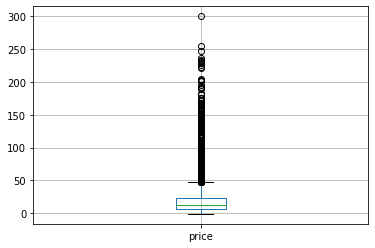

In [170]:
produits[['price']].boxplot()

In [171]:
produits['price'].min()

-1.0

In [172]:
produits['price'].max()

300.0

In [173]:
neg = produits[produits['price'].between(-1, 0)]
neg
# delete the values because a price can't be negative

,id_prod,price,categ
731,T_0,-1.0,0


In [174]:
new_produits = produits.drop([produits.index[731]])
new_produits

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [175]:
ventes = pd.read_csv("ventes.csv")
ventes

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [176]:
ventes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


In [177]:
ventes = ventes.drop_duplicates()
len(ventes)
# here, there are some duplicates

336890

In [178]:
ventes.isnull().sum().sort_values(ascending = False)/len(ventes)

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
dtype: float64

In [188]:
new_data = ventes.merge(clients, how='left', on="client_id").merge(new_produits, how='left', on='id_prod')
new_data

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0
...,...,...,...,...,...,...,...,...
336885,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0
336886,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0
336887,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0
336888,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0


In [189]:
new_data.info()
# price et categ ont le même nbre de valeurs manquantes
# des clients n'ont pas de prix associés, donc pas intéressants dans total vente

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336890 entries, 0 to 336889
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336890 non-null  object 
 1   date        336890 non-null  object 
 2   session_id  336890 non-null  object 
 3   client_id   336890 non-null  object 
 4   sex         336890 non-null  object 
 5   birth       336890 non-null  int64  
 6   price       336713 non-null  float64
 7   categ       336713 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 23.1+ MB


In [181]:
new_data = n_data.drop_duplicates()
len(new_data)

336890

In [182]:
# Pas de doublons ou de valeurs manquantes après le merge
# Mais maintenant on peut associer des ventes avec des clients
# et des ventes à des produits

In [191]:
# afficher les clients sans prix ou categ de produits
new_data[(new_data['price'].isnull()) & (new_data['categ'].isnull())]

,id_prod,date,session_id,client_id,sex,birth,price,categ
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,m,2001,NaN,NaN
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1,m,2001,NaN,NaN
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1,m,2001,NaN,NaN
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0,f,2001,NaN,NaN
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972,NaN,NaN
...,...,...,...,...,...,...,...,...
322597,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,f,1979,NaN,NaN
329300,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,f,1983,NaN,NaN
330371,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,f,1984,NaN,NaN
335405,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,f,1973,NaN,NaN


In [193]:
# afficher les données 'test' et qui n'apportent pas d'info
lignes_test = new_data[
    (new_data['date'].str.contains('test_')) &
    (new_data['id_prod']=='T_0') &  
    (new_data['session_id']=='s_0')]
lignes_test

,id_prod,date,session_id,client_id,sex,birth,price,categ
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,m,2001,NaN,NaN
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1,m,2001,NaN,NaN
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1,m,2001,NaN,NaN
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0,f,2001,NaN,NaN
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1,m,2001,NaN,NaN
...,...,...,...,...,...,...,...,...
264229,T_0,test_2021-03-01 02:30:02.237416,s_0,ct_1,m,2001,NaN,NaN
288815,T_0,test_2021-03-01 02:30:02.237415,s_0,ct_1,m,2001,NaN,NaN
293003,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_0,f,2001,NaN,NaN
298292,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1,m,2001,NaN,NaN


In [ ]:
df = df.drop(lignes_test.index).reset_index() # Suppression des lignes tests
print(len_df_before - len(df), 'lignes tests supprimées')

In [ ]:
new_data['date'] = pd.to_datetime(new_data['date'], format('%Y-%m-%d')
    new_data.info()

In [ ]:
# Mission 2 -
# analyse des données et trouver du sens pour comprendre les ventes
# indicateurs de tendance centrale et de dispersion
# analyse de concentration par courbe de Lorenz/indicateur de Gini
# représentation graphique (histogramme, boxplot, séries temporelles)
# analyses bivariées

In [ ]:
# moyenne des prix
moy = sum(produits['price'])/len(produits['price'])
moy

In [ ]:
# moyenne des prix sur les livres vendus
s_moy = sum(data['price'])/len(data['price'])
s_moy

In [ ]:
# médiane des prix
me = statistics.median(produits['price'])
me

In [ ]:
# médiane des prix sur les livres vendus
s_me = statistics.median(data['price'])
s_me

In [ ]:
# calcul variance
var = sum((xi - moy) ** 2 for xi in produits['price'] / len(produits['price']))
var

In [ ]:
# calcul écart-type
var_res = var ** (0.5)
var_res

In [ ]:
# Boxplot sur les prix par rapport aux ventes réalisées
data[['price']].boxplot()

In [ ]:
# Histogramme de la répartition des prix des différents livres
histogram = new_produits['price'].plot.hist()
plt.show()

In [ ]:
# Histogramme de la répartition des clients par âge
histogr = clients['birth'].plot.hist()

plt.show()

In [ ]:
# Séries temporelles
df = pd.read_csv('clients.csv', parse_dates = ['birth'], index_col = ['birth'])
df